# Práctica - Redes Neuronales con RSNNS

## Redes Neuronales en R

Existen diversas librerías para trabajar con redes neuronales en R. La diferencia principal entre las librerías existentes radica en la complejidad de la red neuronal a modelar y la facilidad de uso por parte del usuario. En esta sección se va a hacer una breve descripción de las librerías más relevantes.

* **Librería nnet:** este paquete es muy sencillo de usar y te permite elaborar redes neuronales de una manera fácil y rápida aunque con complejidad limitada. Por ejemplo, mediante esta librería tan solo se pueden realizar redes con una capa oculta, tan solo permite dos tipos de funciones de activación (sigmoidal o lineal) aunque la función de activación “softmax” también se puede aplicar a las neuronas de salida. Tampoco se puede especificar el valor de eta para controlar el aprendizaje de la red ni aprender mediante “stochastic gradient descent”. A pesar de no permitir elaborar redes muy complejas, incluye la posibilidad de limitar el módulo de los pesos (regularización) o estimar los parámetros (conexiones de la red) mediante la función de máxima verosimilitud en vez de resolver el problema de mínimos cuadrados.

* **Librería neural:** Esta librería también es simple pero presenta varias novedades con respector a nnet. Por un lado te permite visualizar una interfaz gráfica y por otro lado te permite controlar el aprendizaje mediante la regulación de eta (en ste caso, en la función al parámetro se le llama alpha). Esta red permite modelar dos tipos de redes: “radial basis function neural network (RBF-NN)” o las “multilayer perceptron neural network (MLP-NN)”. En las RBF-NN la última capa es lineal, en cambio, la capa oculta presenta una función de activación conocida como “radial basis function”. Este tipo de funciones dependen únicamente de la distancia al origen. Un tipo de función radial es la función de gauss o exponencial (ϕ(x,c)=ϕ(||x−c||)=exp−(ϵ||x−c||)2). La función rfbtrain que es la que se usa la librería neural para entrenar redes neuronales utiliza únicamente la función de gauss como función de activación. En cambio las MLP-NN son entrenadas mediante la función mlptrain, la cual presenta unas características similares que la función nnet del paquete anterior. La diferencia principal radica que en este caso se pueden construir redes con más de una capa y efectuar early-stopping.

* **Librería deepnet:** Esta librería permite elaborar perceptrones multicapa, es decir, con más de una capa oculta. La ventaja de esta librería es que tiene versatilidad a la hora de ajustar los parámetros del aprendizaje: el número de épocas, el ratio de aprendizaje (o eta), la posiblidad de entrenar con subconjuntos de la muestra de train (o batchs) así como la posibilidad de introducir un término de momento para evitar quedarse atrapado en mínimos locales. Concretamente, entrenar con un subconjunto aleatorio de la muestra se conoce como “stochastic gradient descent” y si además se le añade el término del moment, entonces “momentum gradient descent”. Esta manera de estocástica de entrenar es la adoptada hoy en día y por tanto esta librería resulta muy útil, ya que es simple pero versátil. Otra novedad es la posibilidad de regularizar mediante “dropout”. Dropout consiste en entrenar subredes de la red completa generadas aleatoriamente durante un número determinado de épocas. Dichas subredes tienen menor número de parámetros y por tanto resulta eficaz utilizarlo cuando tenemos gran cantidad de parámetros como es el caso de redes con varias capas.

* **Librería neuralnet:** es una librería sencilla de usar cuya principal ventaja es la variedad en algoritmos de aprendizaje que presenta: standard backpropagation y diferentes tipos de resilient backpropagation.

* **Librería AMORE:** la novedad de esta librería es que utiliza un algoritmo de aprendizaje llamado TAO-backpropagation. Este algoritmo es menos sensible a los outliers y por tanto más robusto.

* **Librería RSNNS:** A día de hoy esta librería es una de las más completas, fiables y rápidas implementaciones de redes neuronales. Se apoya en una librería realizada para el software S llamada SNNS. Permite implementar una gran variedad de tipos de topologías de redes neuronales (perceptrones multicapa, funciones radiales, redes dinámicas, redes autoasociativas…)

En esta práctica nos vamos a centrar en el paquete RSNNS debido a su versatilidad. Esta librería también se encuentra dentro de las admitidas por el paquete CARET, el cual se utiliza para estimar la configuración de los parámetros mediante cross-validación o leave-one-out.

Por tanto, en la primera parte de la práctica aprenderemos a construir una red neuronal con el paquete RSNNS, as así como a observar como aprende la red. En la segunda parte de la práctica se enseñará a utilizar el paquete CARET como medio para estimar el número óptimo de neuronas ocultas.

## Construcción de una red neuronal - IRIS

El paquete RSNNS permite elaborar una red neuronal de perceptrones multicapa mediante la función mlp. En cuanto a la estructura, esta función permite elaborar una red con más de una capa y variar el tipo de función de activación mediante los parámetros `size` y `hiddenActFunc` o `outputActFunc` , respectivamente. En cuanto al aprendizaje, se puede tunear tanto el tipo de backpropagation (`learnFunc`) , como la velocidad de aprendizaje(`learFuncParams`) o el número de épocas/iteraciones (`maxit`).

Para elaborar nuestra primera red neuronal vamos a utilizar el dataset iris. Recordamos que el dataset iris consiste en 150 observaciones de 3 tipos de flor distintas (setosa, versicolor y virginica) y cuyo objetivo es clasificar cada tipo en base a 4 parámetros: la longitud y anchura del sépalo, y la longitud y anchura del pétalo. Las funciones `decodeClassLabels`, `splitForTrainingAndTest` y `normTrainingAndTestSet`, son funciones internas de RSNNS que han sido especificament diseñadas para ilustrar con facilidad el preproceso en el dataset de iris. Sus objetivos son convertir a binario las categorías, dividir en train y test, y normalizar los predictores, respectivamente.

In [1]:
# Cargamos la librería RSNNS
library(RSNNS)

# Cargamos el dataser iris
iris <- iris[sample(1:nrow(iris),length(1:nrow(iris))),1:ncol(iris)]
irisValues <- iris[,1:4]
irisTargets <- decodeClassLabels(iris[,5]) # Función interna de RSNNS específica para ilustrar una NN con iris
iris <- splitForTrainingAndTest(irisValues, irisTargets, ratio=0.15)
iris <- normTrainingAndTestSet(iris)

str(iris)

Loading required package: Rcpp



List of 4
 $ inputsTrain : num [1:127, 1:4] -0.883 -0.526 -1.239 -0.526 -1.002 ...
  ..- attr(*, "normParams")=List of 3
  .. ..$ colMeans: num [1:4] 5.84 3.06 3.71 1.17
  .. ..$ colSds  : num [1:4] 0.841 0.444 1.785 0.765
  .. ..$ type    : chr "norm"
 $ targetsTrain: num [1:127, 1:3] 1 1 1 1 0 1 0 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:3] "setosa" "versicolor" "virginica"
 $ inputsTest  : num [1:23, 1:4] -0.8827 -0.8827 0.0683 1.0194 -1.1205 ...
  ..- attr(*, "normParams")=List of 3
  .. ..$ colMeans: num [1:4] 5.84 3.06 3.71 1.17
  .. ..$ colSds  : num [1:4] 0.841 0.444 1.785 0.765
  .. ..$ type    : chr "norm"
 $ targetsTest : num [1:23, 1:3] 1 1 0 0 0 0 0 1 1 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:3] "setosa" "versicolor" "virginica"


El resultado es una lista con 4 miembros: `inputsTrain`, `targetsTrain`, `inputsTest`, `targetsTest`. El dataset de train consta ahora de 127 observaciones por 23 del dataset de test.

Una vez preprocesado el dataset podemos elaborar la red neuronal. En el código de abajo se muestra como se construye una red de 5 neuronas ocultas con función de salida sigmoidal/logística. Mediante la función `summary()`, la cual es de base de R, podemos ver las propiedades del modelo estimado.

In [2]:
model <- mlp(iris$inputsTrain, iris$targetsTrain, size = 5, 
             outputActFunc = "Act_Logistic",
             learnFuncParams = c(0.1), # Quiere decir que eta = 0.1
             maxit = 1000, # 50 épocas 
             inputsTest = iris$inputsTest, targetsTest = iris$targetsTest)
summary(model)

SNNS network definition file V1.4-3D
generated at Mon Feb 15 15:14:41 2021

network name : RSNNS_untitled
source files :
no. of units : 12
no. of connections : 35
no. of unit types : 0
no. of site types : 0


learning function : Std_Backpropagation
update function   : Topological_Order


unit default section :

act      | bias     | st | subnet | layer | act func     | out func
---------|----------|----|--------|-------|--------------|-------------
 0.00000 |  0.00000 | i  |      0 |     1 | Act_Logistic | Out_Identity 
---------|----------|----|--------|-------|--------------|-------------


unit definition section :

no. | typeName | unitName          | act      | bias     | st | position | act func     | out func | sites
----|----------|-------------------|----------|----------|----|----------|--------------|----------|-------
  1 |          | Input_1           |  1.13829 | -0.15968 | i  | 1,0,0    | Act_Identity |          | 
  2 |          | Input_2           |  0.30696 | -0.08988

Podemos visualizar como ha evolucionado el error en cada iteración. Recordemos que la red neuronal optimiza error cuadrático medio entre el valor esperado y la salida de la red, por ello el error que vemos en la gráfica es el MSE o Mean Squared Error. La gráfica se puede dibujar mediante la función `plotIterativeError` del propio paquete RSNNS.

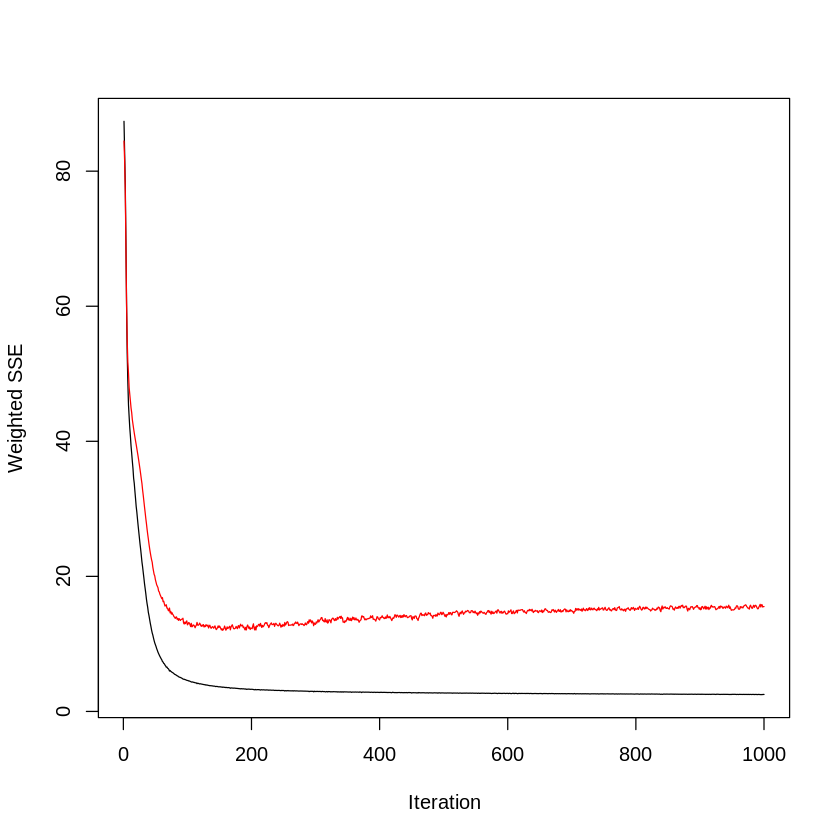

In [3]:
plotIterativeError(model)

La curva error es muy útil para visualizar como va divergiendo la predicción en distintos datasets y por lo tanto diagnoisticar el sobreajuste. Un criterio para evitar el sobreajuste es utilizar early-stopping: parar el aprendizaje cuando la diferencia entre las dos curvas de error sea superior a un umbral. Recordemos que el sobreajuste de un modelo está muy influenciado por la cantidad de parámetros del sistema. En el caso anterior tan solo teníamos 2 neuronas ocultas, por ello vamos a observar el sobreajuste en un modelo cuyo número de neuronas ocultas (y por tanto de parámetros) es mucho mayor.

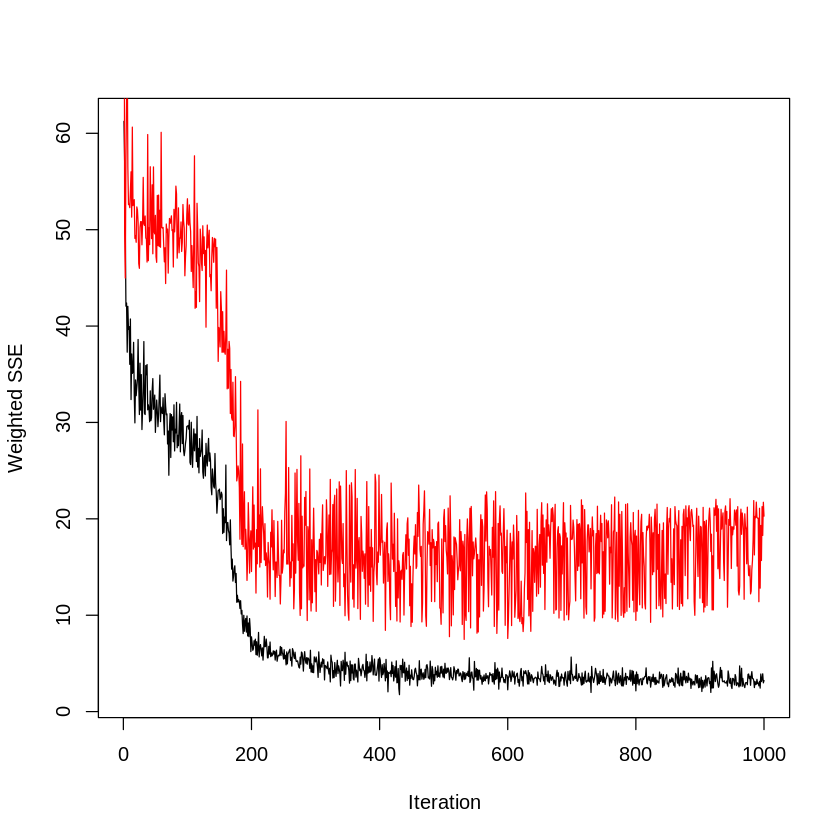

In [4]:
model <- mlp(iris$inputsTrain, iris$targetsTrain, size = 1000, 
             outputActFunc = "Act_Logistic",
             learnFuncParams = c(0.1), # Quiere decir que eta = 0.1
             maxit = 1000, # 50 épocas 
             inputsTest = iris$inputsTest, targetsTest = iris$targetsTest)

plotIterativeError(model)

Podemos observar como en esta figura el error de train (curva negra) es alrededor de 0, lo que indica que el modelo tiene la suficiente flexibilidad como para ajustarse totalmente a los datos. La variabilidad en el error se debe al efecto que tiene el learning rate (velocidad de aprendizaje) al oscilar en torno al mínimo. En el caso anterior (5 neuronas ocultas) la nolinealidad de la superficie de error es menor y por tanto una osicalación en torno al mínimo tiene un menor efecto. Para ser más concretos podemos obtener las predicciones del modelo ya sea mediante la información contenida en el modelo (caso (a)) o mediante el método tradicional: usando la función de base predict.

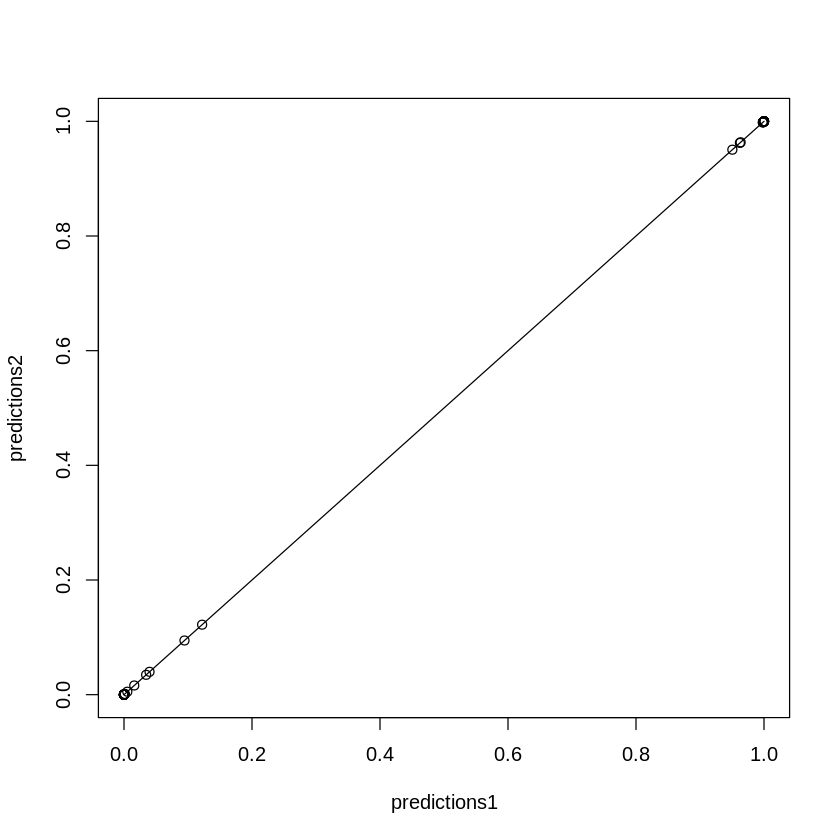

In [5]:
## Caso (a)
predictions1 <- model$fittedTestValues
#plot(1:nrow(model$fitted.values),model$fitted.values[,1])
## Caso (b)
predictions2 <- predict(model,iris$inputsTest)
plot(predictions1,predictions2)
lines(0:1,0:1)

Como hemos visto en asignaturas anteriores, para validar una predicción de una variable binomial es más coherente utilizar otras índices como el area bajo la curva (AUC, por sus siglas en inglés) o la matriz de confusión, en lugar del MSE. El paquete RSNN también proporciona funciones que de una manera sencilla y rápida nos permite visualizar dichos índices y por tanto juzgar nuestro modelo.

In [6]:
confusionMatrix(iris$targetsTest,predictions2)

       predictions
targets 1 2 3
      1 6 0 0
      2 0 6 2
      3 0 0 9

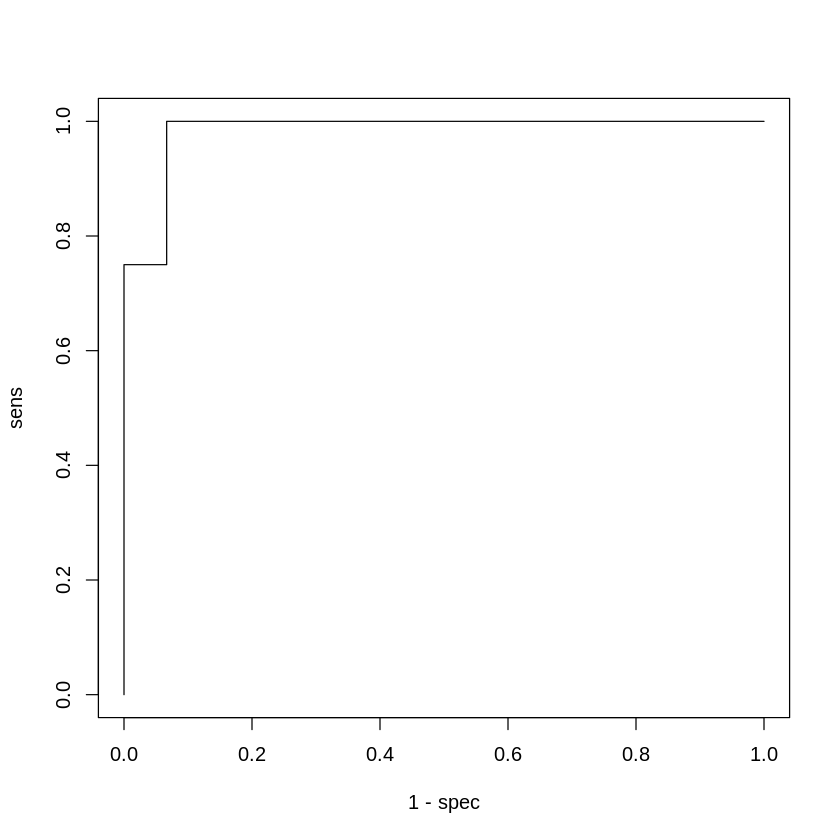

In [7]:
plotROC(predictions2[,2], iris$targetsTest[,2])

Una vez visto la funcionalidad básica de las función `mlp` vamos a probar a cambiar parámetros de la función. Uno de ellos es el parámetro `size`, responsable del número de neuronas así como del número de capas. Si el parámetro size es un vector entonces tendremos una red neuronal con tantas capas como longitud tenga el vector.

In [8]:
model <- mlp(iris$inputsTrain, iris$targetsTrain, size = c(10,10), 
             outputActFunc = "Act_Logistic",
             learnFuncParams = c(0.1), # Quiere decir que eta = 0.1
             maxit = 50, # 50 épocas 
             inputsTest = iris$inputsTest, targetsTest = iris$targetsTest)

De hecho utilizando la librería NeuralNetTools podemos visualizar la estructura de la red.

also installing the dependencies ‘plyr’, ‘cpp11’, ‘nnet’, ‘reshape2’, ‘tidyr’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



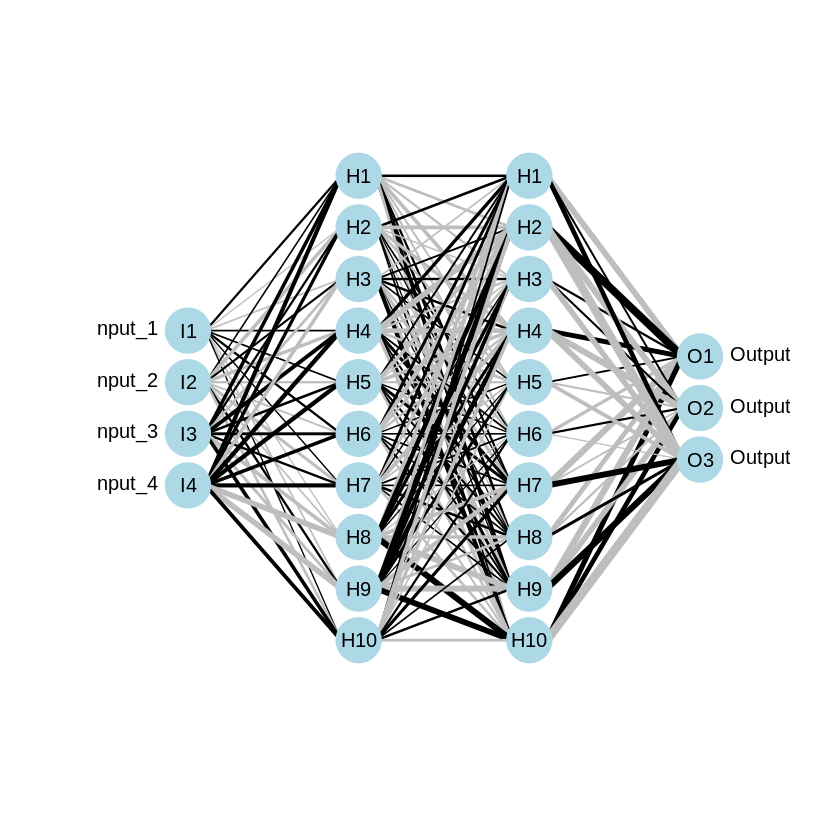

In [10]:
library(NeuralNetTools)
plotnet(model)

Donde el grosor de la línea es proporcional al valor absoluto del coeficiente estimado por la red y el color el signo del coeficiente.

Hasta ahora hemos estado entrenando con el algoritmo de backpropagation estándar. Sim embargo la librería nos permite entrenar con variantes del algoritmo estándar, entre las que se encuentram: algoritmo+momento y algoritmo+weightdecay y el algoritmo conjugado de gradiente.

               Δw(t)=η∂E(t)∂w+αΔw(t−1)
               Δw(t)=η∂E(t)∂w+λw
En el primer caso el aprendizaje se va a apoyar en el gradiente del paso anterior, por tanto presenta inercia, es decir, tiene a conservar el estado del sistema en un instante anterior (t-1). Esto va a ocasionar que el aprendizaje se acelere o relentice en algunas etapas. En cambio en el segundo caso, la búsqueda de parámetros va a estar sesgada a una región del espacio limitada por la norma 1 o 2 del módulo de los pesos (regularización). En el tercer caso, el paso no es lineal, sino curvo, lo que acelera el aprendizaje aunque requiere un mayor coste computacional ya que calcular las derivadas de segundo orden es mas costoso. Para aplicar estos algoritmos en R hay que modificar el parámetro learnFunc.

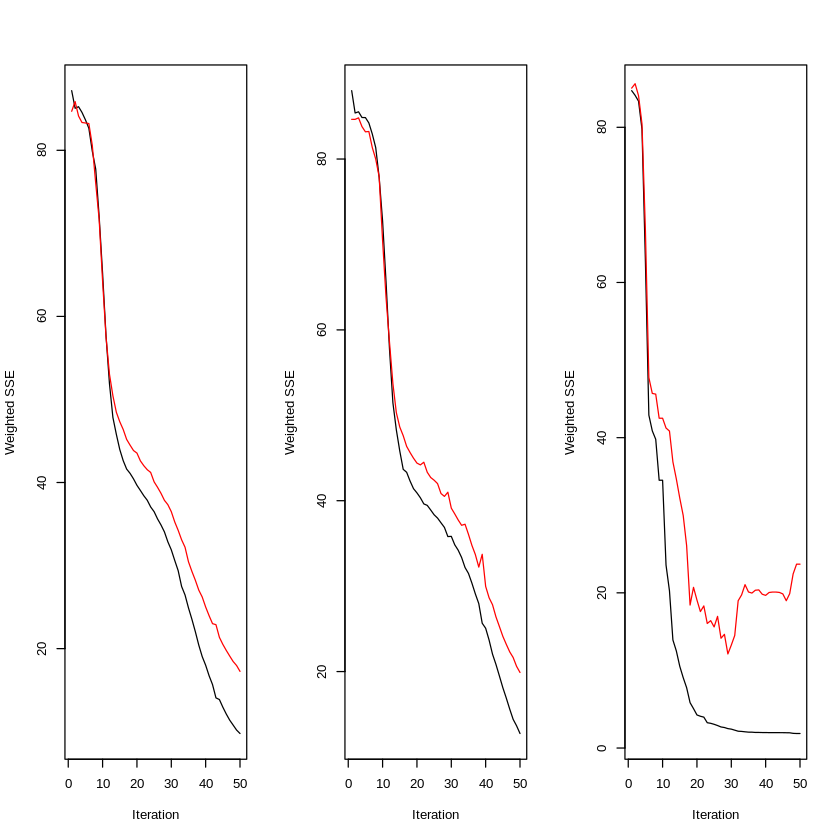

In [11]:
# Backprop estandar
model1 <- mlp(iris$inputsTrain, iris$targetsTrain, size = c(10,10), 
             outputActFunc = "Act_Logistic",
             learnFunc = "Std_Backpropagation",
             learnFuncParams = c(0.1), # Quiere decir que eta = 0.1
             maxit = 50, # 50 épocas 
             inputsTest = iris$inputsTest, targetsTest = iris$targetsTest)

# Gradient+momentum
model2 <- mlp(iris$inputsTrain, iris$targetsTrain, size = c(10,10), 
             outputActFunc = "Act_Logistic",
             learnFunc = "BackpropMomentum",
             learnFuncParams = c(0.1,0.1), # Quiere decir que eta = 0.1
             maxit = 50, # 50 épocas 
             inputsTest = iris$inputsTest, targetsTest = iris$targetsTest)

# Gradient+scaled conjugate gradient
model3 <- mlp(iris$inputsTrain, iris$targetsTrain, size = c(10,10), 
             outputActFunc = "Act_Logistic",
             learnFunc = "SCG",
             learnFuncParams = c(0.1), # Quiere decir que eta = 0.1
             maxit = 50, # 50 épocas 
             inputsTest = iris$inputsTest, targetsTest = iris$targetsTest)

par(mfrow = c(1,3))
plotIterativeError(model1)
plotIterativeError(model2)
plotIterativeError(model3)

El módulo de los pesos al entrenar con weight decay puede verse dibujando la red, donde recordemos que el grosor de las líneas indica el módulo.

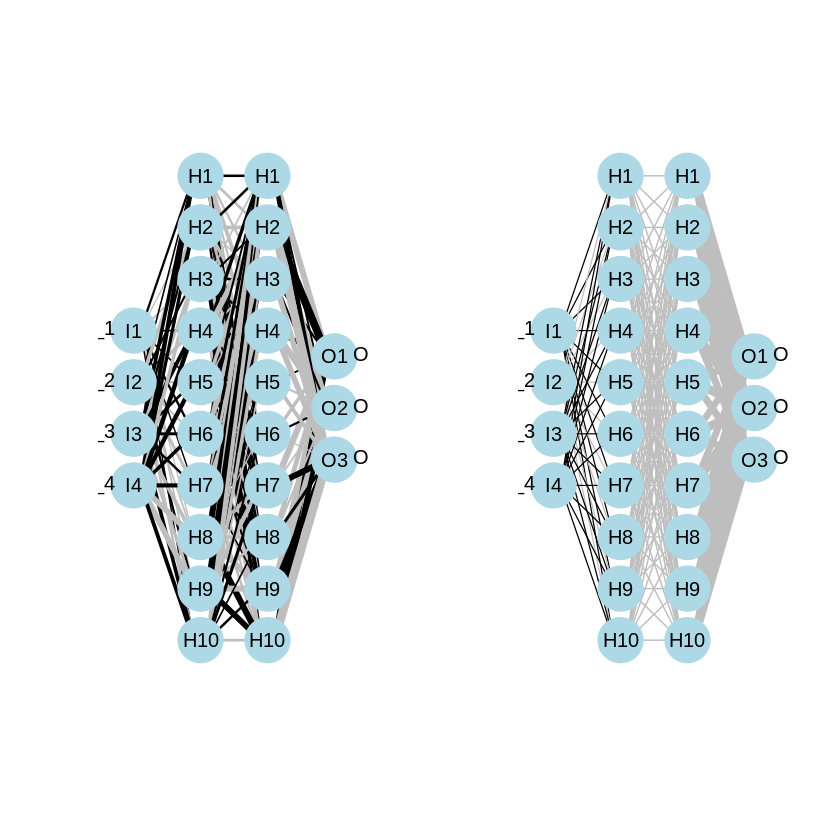

In [12]:
# Gradient+weight decay
model4 <- mlp(iris$inputsTrain, iris$targetsTrain, size = c(10,10), 
             outputActFunc = "Act_Logistic",
             learnFunc = "BackpropWeightDecay",
             learnFuncParams = c(0.1,0.001), # Quiere decir que eta = 0.1 y lamda = 0.001
             maxit = 1000, # 50 épocas 
             inputsTest = iris$inputsTest, targetsTest = iris$targetsTest)
par(mfrow=c(1,2))
plotnet(model)
plotnet(model4)

## Construcción de una red neuronal - Círculo
La separación de las clases del dataset de iris no es un caso que requiera demasiada no linealidad. De hecho, en asignaturas anteriores visteis como métodos lineales daban un resultado bastante bueno sin necesidad de acudir a métodos no lineales. Por ello vamos a construir una red neuronal pero en este caso para un dataset cuya separación de las clases requiera no linealidad, concretamente en el dataset del círculo.

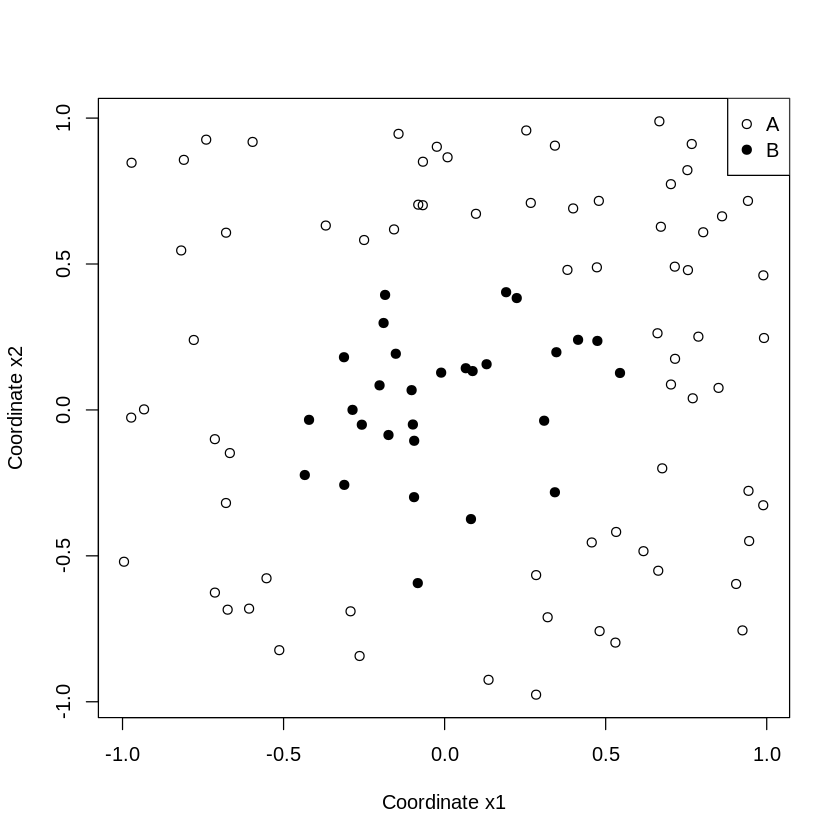

In [13]:
### Cargamos los datos
df <- read.table("circle.txt")
colnames(df) <- c("x1","x2","y")
### Visualizamos los datos
ind.A <- which(df$y == 0)
ind.B <- which(df$y == 1)
plot(df$x1[ind.A],df$x2[ind.A], pch = 21, xlab = "Coordinate x1", ylab = "Coordinate x2")
points(df$x1[ind.B],df$x2[ind.B], pch = 19)
legend("topright", legend = c("A", "B"),
      pch = c(21,19))

A medida que aumentamos el número de neuronas ocultas y/o capas aumentamos la nolinealidad del sistema. ¿Para qué número de neuronas podemos encontrar una buena clasificación de las clases?

In [ ]:
library(verification)

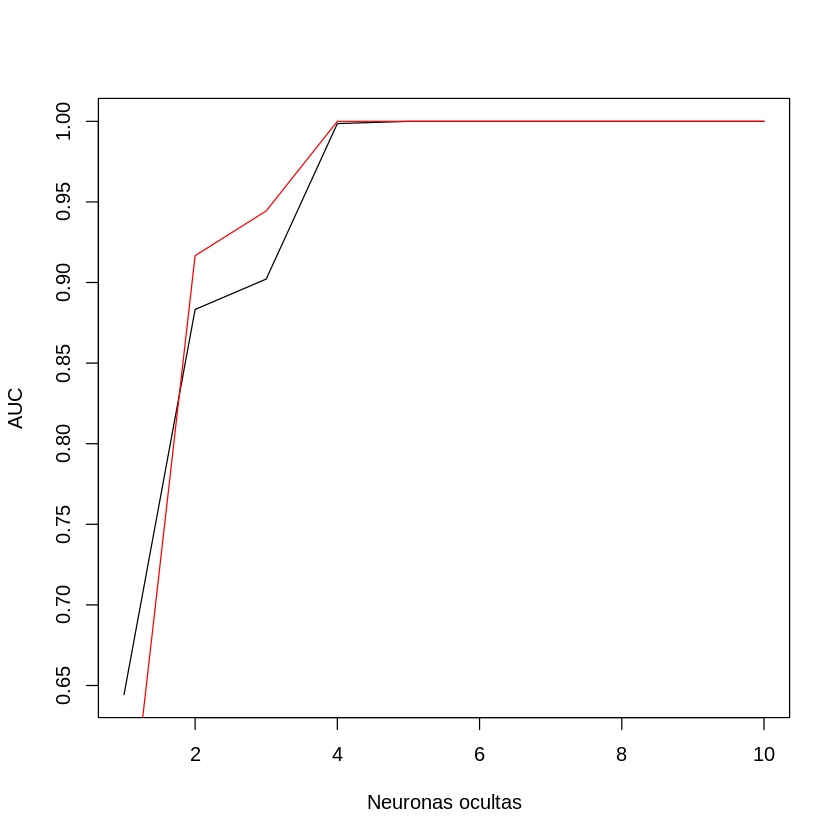

In [15]:
aucTRAIN <- aucTEST <- vector("numeric", length = 10)
for (i in 1:10) {
  model <- mlp(df[1:80,-3], df[1:80,3], size = i, 
               outputActFunc = "Act_Logistic",
               learnFuncParams = c(0.1), # Quiere decir que eta = 0.1
               maxit = 1000) # 50 épocas 
  predTRAIN <- predict(model,df[1:80,-3])
  aucTRAIN[i] <- roc.area(df$y[1:80],predTRAIN)$A
  predTEST <- predict(model,df[81:100,-3])
  aucTEST[i] <- roc.area(df$y[81:100],predTEST)$A
}
plot(1:10,aucTRAIN,type = "l", col = "black", ylab = "AUC", xlab = "Neuronas ocultas")
lines(1:10,aucTEST,col = "red")

Ahora vamos a comprobar lo rápido que aprende la red variando la tasa de aprendizaje. Para ello vamos a dibujar el auc de varios modelos que han sido entrenados con learning rates diferentes.

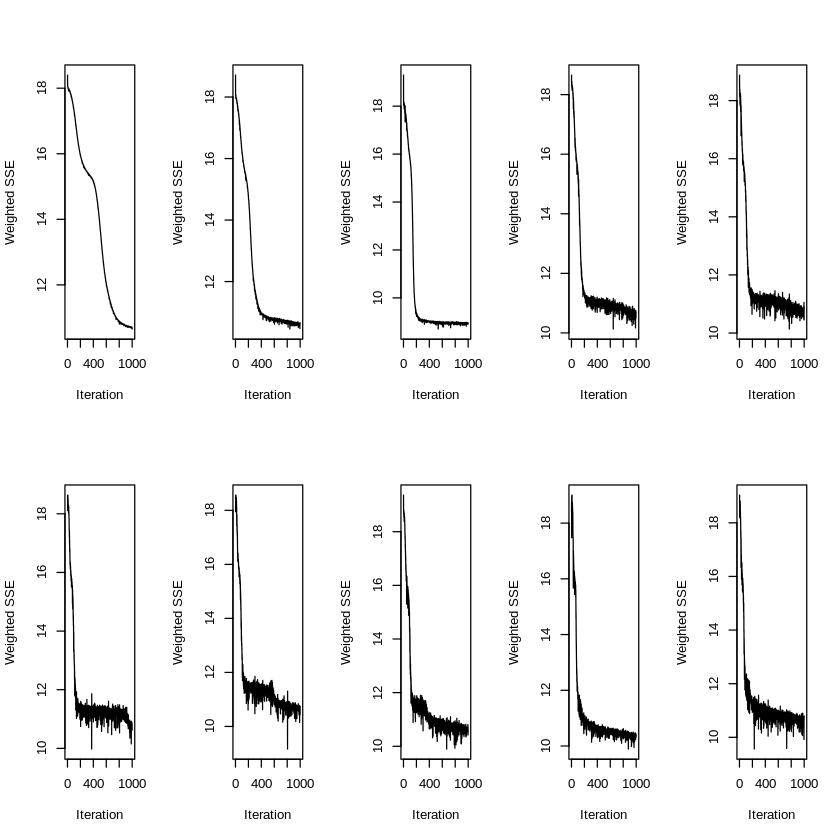

In [16]:
par(mfrow=c(2,5))
for (i in 1:10) {
  model <- mlp(df[1:80,-3], df[1:80,3], size = 2, 
               outputActFunc = "Act_Logistic",
               learnFuncParams = c(i*0.1), # Quiere decir que eta = 0.1
               maxit = 1000) # 50 épocas 
  
  plotIterativeError(model)
}

Como se puede observar la red aprende más lento cuando la tasa de aprendizaje es menor, sin embargo el aprendizaje es más estable ya que no hay cambios abruptos por cada paso en la superficie de error.

Es interesante observar la probabilidad que asigna nuestra red en cada región del espacio formado por los predictores a pertenecer a una clase u otra. Para ello vamos a construir una rejilla y a evaluarla en nuestra red tal como indica el código de abajo. Primero generamos una rejilla en el espacio comprendido por los predictores x1 y x2.

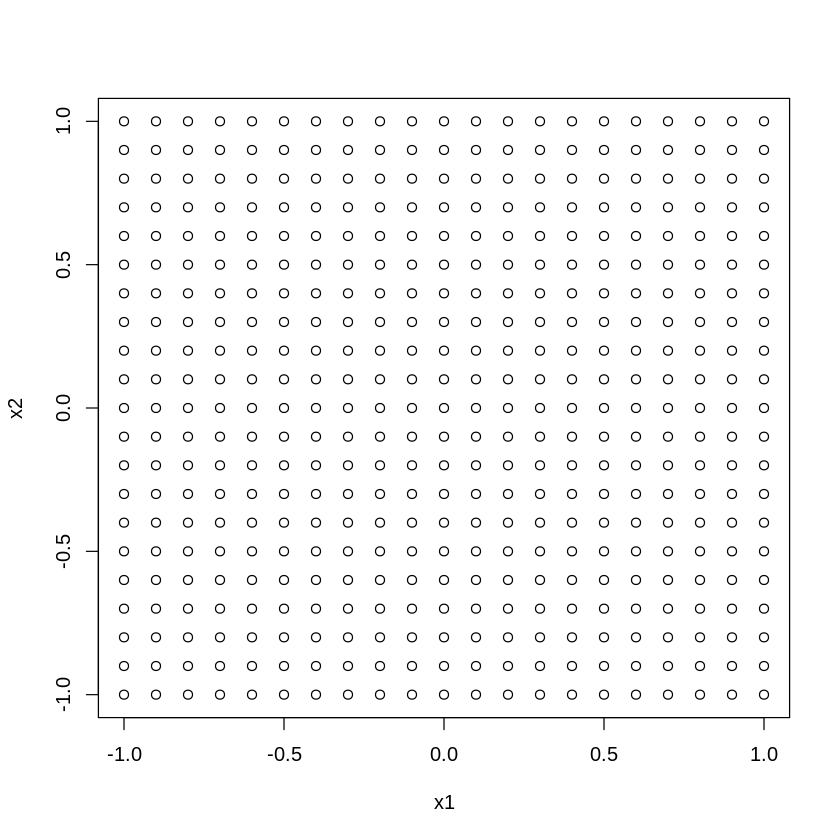

In [17]:
# Construcción de la rejilla
x1 <- seq(from = -1, to = 1, by = 0.1)
n <- length(x1)
x1 <- rep(x1,n)
m <- 0
x2 <- vector("numeric", length(x1))
for (i in 1:n) {
  m <- (i-1)*n + 1
  x2[m:(i*n)] <- rep(x1[i],n)
}
plot(x1,x2)

Ahora vamos a evaluar esta rejilla en distintas redes, variando en (a) el número de épocas y (b) el número de neuronas ocultas.

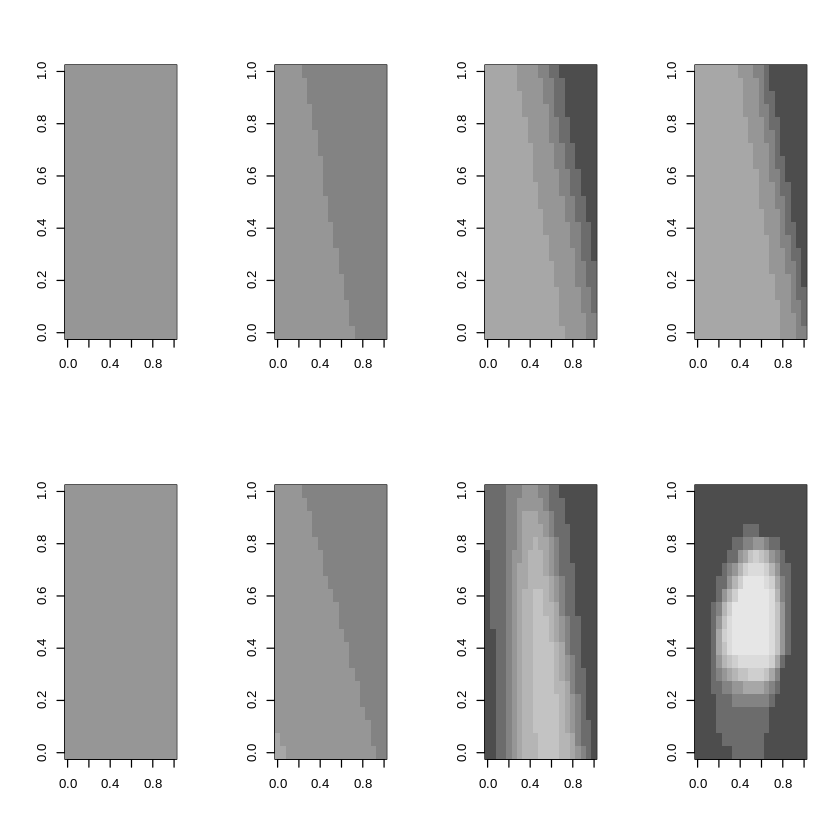

In [18]:
par(mfrow=c(2,4))
for (j in c(1,5)){
  for (i in c(1,100,500,1000)) {
    model <- mlp(df[,-3], df[,3], size = j, 
                 outputActFunc = "Act_Logistic",
                 learnFuncParams = 0.1, # Quiere decir que eta = 0.1
                 maxit = i) # 50 épocas 
    pred <- predict(model,cbind(x1,x2))
    image(matrix(pred, nrow = n, ncol = n), zlim = c(0,1), col = gray.colors(10))
    
  }
}

Se puede observar en la figura anterior como cuando solo hay 1 neurona oculta, la red no tiene suficiente flexibilidad como para ajustar un círculo (primeras 4 figuras). En cambio, si aumentamos el número de neuronas oculta a 5, la red es capaz de generar un círculo como figura geométrica de separación entre clases (siempre y cuando se le deje entrenar un número suficiente de épocas).

## Cross validación de redes neuronales - CARET
Como visteis en asignaturas anteriores, lo importante de un modelo es que sea capaz de extrapolar sus buenos resultados a muestras de la población que no hayan sido previamente “vistas” por el modelo. Es decir, evitar en la medida de lo posible que el modelo no esté excesivamente ajustado a la muestra de entrenamiento y por tanto tenga capacidad de generalización. La capacidad de generalización de un modelo depende en gran medida de los grados de libertad del sistema, ya que cuantos más parámetros sea capaz de ajustar un modelo más flexibilidad tendrá para ajustarse completamente a los datos. Por tanto, para encontrar una configuración que evite el sobreajuste existen diversosprocedimientos destacando entre ellos la cross validación. Si recordais, cross validar consiste en dividir la muestra en un número k de folds e ir alternando dichos folds en la etapa de entrenamiento. Mediante esta manera uno puede encontrar una configuración que generalice bien, por ejemplo encontrar el parámetro k en el método de vecinos cercanos… o el número de neuronas ocultas en una red neuronal.

Para realizar cross validación en R hay que utilizar el paquete CARET, que ya utilizasteis en sesiones anteriores. Este paquete admite una serie de librerías correspondientes a diversos métodos de machine learning entre las que se encuentra la librería RSNNS (otro motivo más por el que usar esta librería a la hora de construir una red neuronal). En esta sección vamos a utilizar el paquete CARET para encontrar el número de neuronas ocultas de una red neuronal, tanto de 1 capa como de varias capas.

In [21]:
library(caret)
# Cross validation con 4 folds para una red neuronal con una capa oculta
df$y <- as.factor(df$y)
ctrl <- trainControl(method = "cv", number = 4)
fit <- train(y ~ .,
            data = df,
            method = "mlp",
            trControl = ctrl,
            preProc = c("center", "scale"))
fit$results

,size,Accuracy,Kappa,AccuracySD,KappaSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.71,0.0000000,0.02000000,0.0000000
2,3,0.75,0.2662367,0.08869423,0.3344799
3,5,0.81,0.5661227,0.09451631,0.1643513


En el cuadro anterior, la columna `size` indica el número de neuronas ocultas. En este caso se ha cross validado para configuraciones de 1, 3 y 5 neuronas ocultas. Como se puede observar la configuración de 5 neuronas ocultas presenta un menor Root Mean Squared Error (RMSE) que el resto de configuraciones. Esto coincide con el rastreo sin cross validar que habíamos utilizado para elaborar una figura anterior, aunque en ese caso la métrica era el AUC. Las configuraciones que prueba (1, 3 y 5 neuronas ocultas) van de acuerdo al grid que CARET cree, internamente, más apropiado rastrear. Sin embargo las configuraciones a rastrear pueden ser explícitamente indicadas por el usuario, tal y como mostramos a continuación.

In [22]:
ctrl <- trainControl(method = "cv",number = 4,search = "grid")
pp <- getModelInfo(model = "mlp", regex = TRUE)
pp$mlp$parameters

parameter,class,label
<chr>,<chr>,<chr>
size,numeric,#Hidden Units


Utiliamos la función `getModelInfo` para conocer el nombre del parámetro que define el número de neuronas ocultas, en este caso: `size`. El nombre lo necesitamos para indicar el grid, o conjunto de valores, a cross validar.

In [23]:
grid <- expand.grid(size = 1:10)
fit <- train(y ~ .,
            data = df,
            method = "mlp",
            trControl = ctrl,
            tuneGrid = grid,     
            preProc = c("center", "scale"))
fit$results

,size,Accuracy,Kappa,AccuracySD,KappaSD
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.7101603,0.0000000,0.01311097,0.0000000
2,2,0.6917949,0.1517572,0.11494732,0.2779708
3,3,0.7309936,0.1749468,0.07793061,0.2181214
4,4,0.8602564,0.6236237,0.09424603,0.2691659
5,5,0.7886218,0.3319214,0.08720684,0.3838110
6,6,0.7906731,0.4205343,0.08110940,0.2266650
7,7,0.8202244,0.5065886,0.06777436,0.2093788
8,8,0.8014423,0.4595090,0.08795752,0.2809505
9,9,0.7997436,0.4204358,0.14303280,0.4314442


La totalidad de los resultados puede verse en la tabla anterior. En este caso el número óptimo de neuronas ocultas es 4. El propio objeto resultante `fit` nos indica explícitamente la mejor configuración dentro de las que ha rastreado:

In [24]:
fit$bestTune

,size
,<int>
4,4


El paquete CARET también te permite hacer cross validación para configuraciones de más de una capa. En el siguiente ejemplo vamos a ver como esto es posible. El principal cambio radica en que el método ya no es `mlp` sino `mlpML` y que el nombre de las neuronas ocultas ya no es `size`, sino `layer1`, `layer2` y `layer3`. Aunque utilizando la función mlp del paquete RSNNS uno puede construir una red con todas las capas ocultas que desee, en CARET el top está en 3 capas ocultas.

In [ ]:
grid = expand.grid(layer1 = 1:10,
                       layer2 = 1:10,
                       layer3 = 0) # Si no queremos que haya tercera capa entonces layer3 = 0
fit <- train(y ~ .,
            data = df,
            method = "mlpML",
            trControl = ctrl,
            tuneGrid = grid,     
            preProc = c("center", "scale"))